# Colombian Minimum Wage Analysis and Visualizations
 

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sn
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

## Reading the Data

In [3]:
df_TRM=pd.read_csv("Data\Tasa_de_Cambio_Representativa_del_Mercado-_TRM.csv")
df_min_wage=pd.read_excel("Data\SLR_Serie historica IQY.xlsx",header=5)

## Cleaning the Data

Cleaning Colombian Minimum Wage Data

In [4]:
df_min_wage.head()
df_min_wage.drop(columns=["Unnamed: 5","Salario mínimo diario (COP)","Decretos del Gobierno Nacional"],inplace=True)
df_min_wage.rename(columns={"Año (aaaa)":"Year","Salario mínimo mensual (COP)":"Monthly Minimum Wage (COP)","Variación porcentual anual %":"Yearly Percentage Variation %"},inplace=True)
df_min_wage.drop(df_min_wage.index[39:],inplace=True)
df_min_wage.head()



,Year,Monthly Minimum Wage (COP),Yearly Percentage Variation %
0,1984,11298.0,NaN
1,1985,13558.0,20.0
2,1986,16811.0,24.0
3,1987,20510.0,22.0
4,1988,25637.0,25.0


Cleaning of Representative Market exchange Rate (TRM -> spanish abreviation)

In [5]:
df_TRM.head()
df_TRM.drop(columns="UNIDAD",inplace=True)
df_TRM.rename(columns={"VALOR":"Value","VIGENCIADESDE":"Valid Since","VIGENCIAHASTA":"Valid until"},inplace=True)
df_TRM["Valid Since"]=pd.to_datetime(df_TRM["Valid Since"],dayfirst=True)
df_TRM["Valid until"]=pd.to_datetime(df_TRM["Valid until"],dayfirst=True)
#Values that were valid for more than the same day are an indicator of the value being inaccurate, the value should change daily.
df_TRM["Date"]=df_TRM["Valid Since"]
df_TRM.drop(columns=["Valid Since","Valid until"],inplace=True)
df_TRM.head()

,Value,Date
0,2850.98,2002-10-09
1,2854.04,2002-10-10
2,2870.63,2002-10-11
3,2861.16,2002-10-12
4,2852.99,2002-10-16


## Exploring the Data

### TRM Visualization

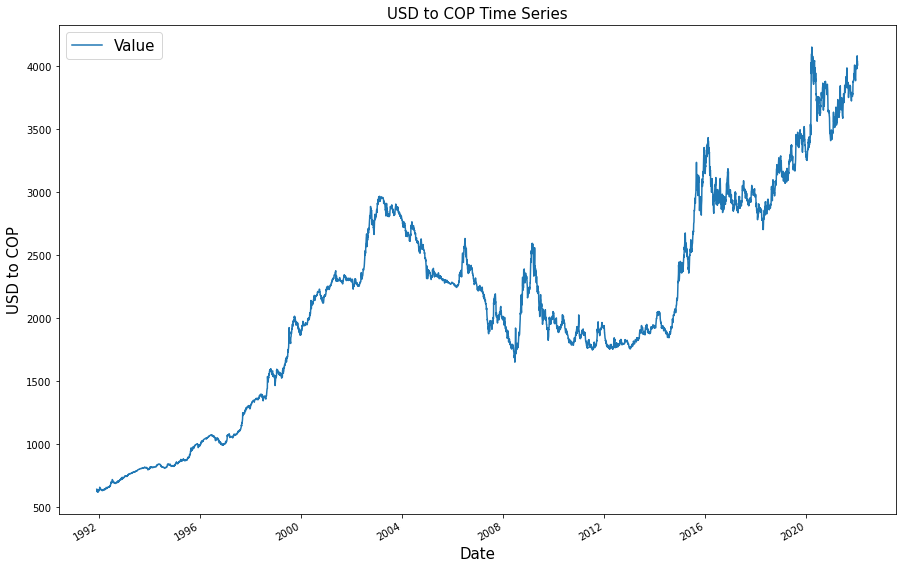

In [6]:
rcParams["figure.figsize"]=15,10
plot=df_TRM.plot(x="Date",y="Value")
plt.title("USD to COP Time Series",fontsize=15)
plt.ylabel("USD to COP",fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.legend(fontsize=15)
ax = plt.gca()


With this plot we can confirm the data has an aggresive upwards trend, thus meaning the Colombian peso has severly depreciated in comaprison to US Dollars.

### Minimum Wage Visualization

Text(0.5, 1.0, 'Yearly Percentage Variation % vs Time')

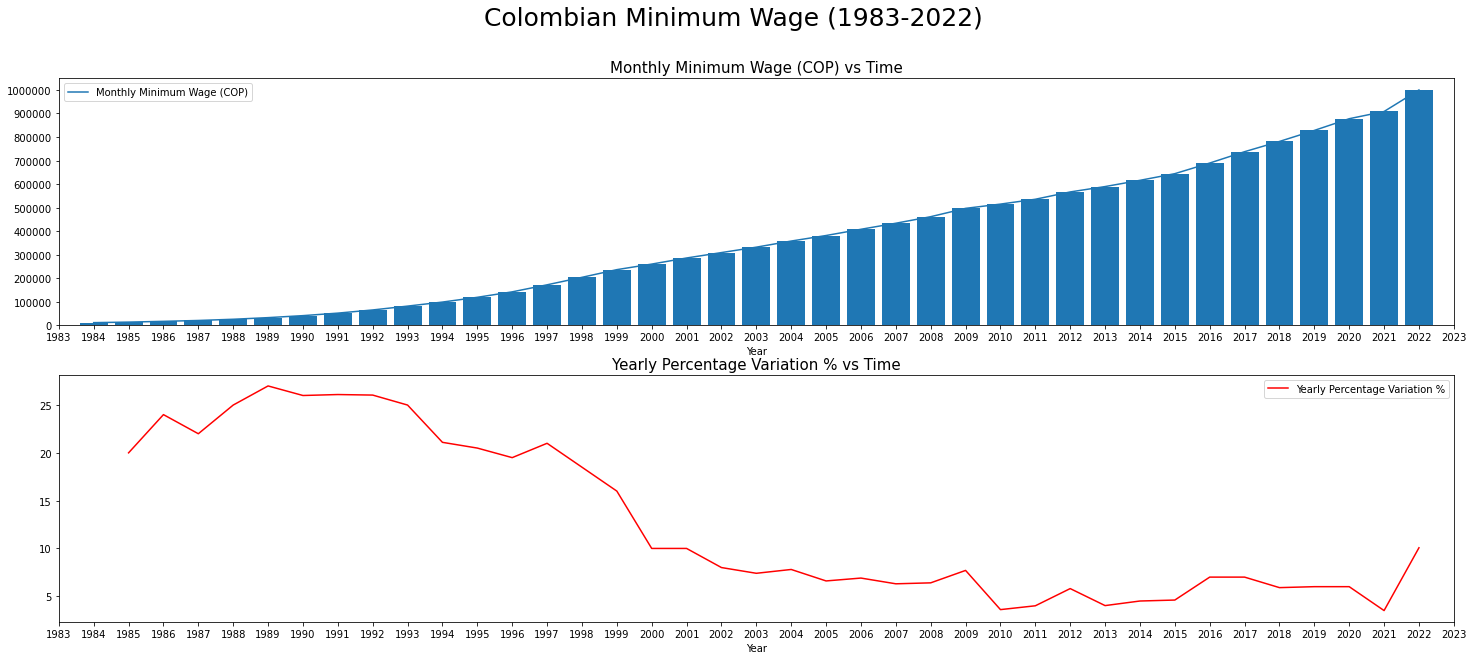

In [21]:
rcParams['figure.figsize']=25,10 
fig, axs = plt.subplots(2,1)
df_min_wage.plot(x="Year",y=["Monthly Minimum Wage (COP)","Yearly Percentage Variation %"],xlim=[1983,2023],subplots=True,color=["tab:blue","red"],ax=axs)
axs[0].bar(x=df_min_wage["Year"],height=df_min_wage["Monthly Minimum Wage (COP)"])
axs[0].get_yaxis().get_major_formatter().set_scientific(False)
axs[0].locator_params(axis="x", nbins=43)
axs[0].locator_params(axis="y", nbins=20)
axs[1].locator_params(axis="x", nbins=43)
fig.suptitle("Colombian Minimum Wage (1983-2022)",fontsize=25)
axs[0].set_title("Monthly Minimum Wage (COP) vs Time",fontsize=15)
axs[1].set_title("Yearly Percentage Variation % vs Time",fontsize=15)

We can see that the Colombian minimum wage increases each year, but the percentage increase has a decreasing tendency. In other words; each year, Colombian minimum wage increases less.

### Analysis

In [8]:
df_TRM["Year"]=df_TRM["Date"].dt.year
df_TRM.head()
df_TRM_grouped=df_TRM.drop(columns="Date")
df_TRM_grouped=df_TRM_grouped.groupby(by="Year").max()
df_TRM_grouped.reset_index(inplace=True)
df_TRM_grouped.rename(columns={"Value":"USD to COP"},inplace=True)
df_TRM_grouped.head()



,Year,USD to COP
0,1991,643.42
1,1992,738.19
2,1993,819.55
3,1994,844.40
4,1995,1003.47


In [9]:
df_joined=pd.merge(df_TRM_grouped,df_min_wage,on="Year")
df_joined["Monthly Minimum Wage (USD)"]=df_joined["Monthly Minimum Wage (COP)"]/df_joined["USD to COP"]
df_joined.head()


,Year,USD to COP,Monthly Minimum Wage (COP),Yearly Percentage Variation %,Monthly Minimum Wage (USD)
0,1991,643.42,51720.0,26.100,80.382954
1,1992,738.19,65190.0,26.044,88.310598
2,1993,819.55,81510.0,25.000,99.457019
3,1994,844.40,98700.0,21.100,116.887731
4,1995,1003.47,118934.0,20.500,118.522726


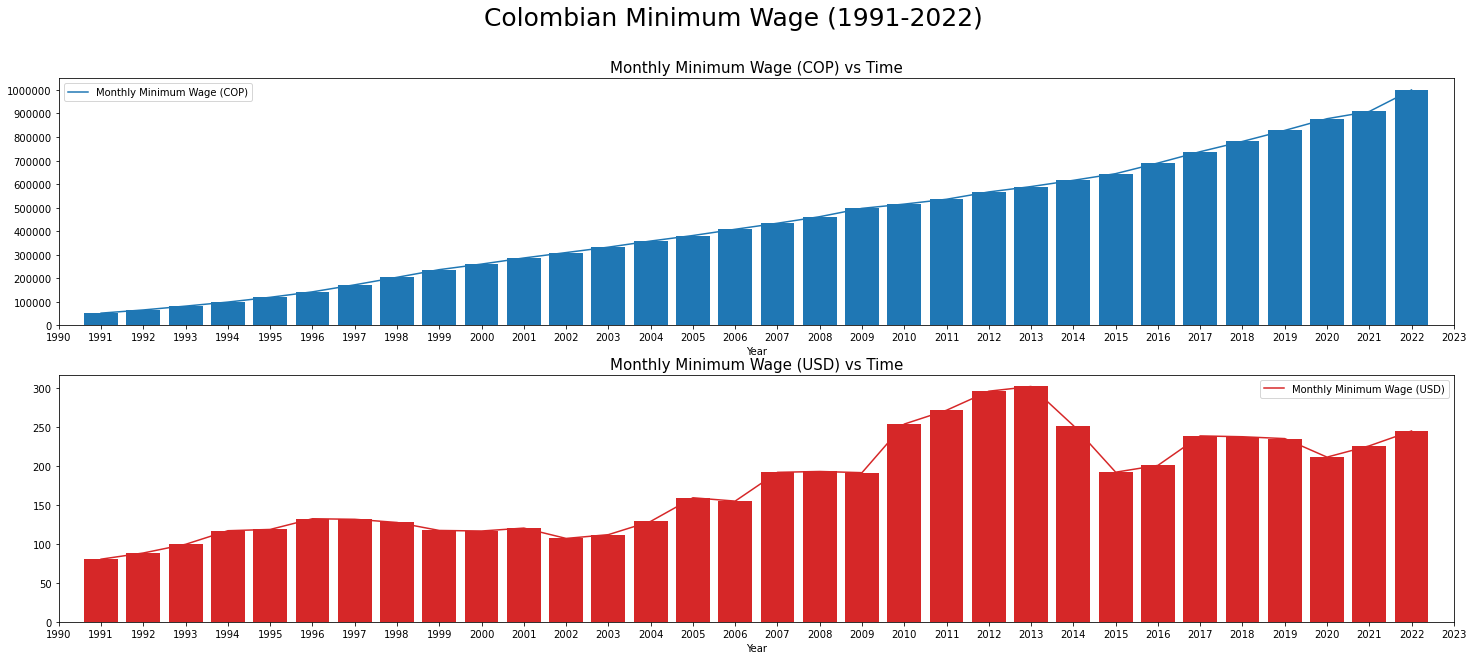

In [22]:
rcParams['figure.figsize']=25,10 
fig, axs = plt.subplots(2,1)
df_joined.plot(x="Year",y=["Monthly Minimum Wage (COP)","Monthly Minimum Wage (USD)"],xlim=[1990,2023],subplots=True,color=["tab:blue","tab:red"],ax=axs)
axs[0].bar(x=df_joined["Year"],height=df_joined["Monthly Minimum Wage (COP)"])
axs[0].get_yaxis().get_major_formatter().set_scientific(False)
axs[0].locator_params(axis="x", nbins=43)
axs[0].locator_params(axis="y", nbins=20)
axs[1].bar(x=df_joined["Year"],height=df_joined["Monthly Minimum Wage (USD)"],color="tab:red")
axs[1].locator_params(axis="x", nbins=43)
fig.suptitle("Colombian Minimum Wage (1991-2022)",fontsize=25)
axs[0].set_title("Monthly Minimum Wage (COP) vs Time",fontsize=15)
axs[1].set_title("Monthly Minimum Wage (USD) vs Time",fontsize=15)
fig.patch.set_facecolor('white')


In this visualization its clear that while the Colombian minimum wage in Colombian Pesos shows an upwards trend, the depreciation of the Colombian Peso when compared to US Dollars causes a decrease in Colombian minimum wage in US Dollars in some years.
Thus, we can conclude that though in hindsight the Colombian minimum wage has been increasing since 1991 up to 2022, relative to US Dollars, this is not true; so the purchasing power of Colombians has not behaved proportionately to the apparent increases in minimum wage.